In [ ]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns
from scipy import stats
import numpy as np


#Загрузите файл HR.csv в pandas dataframe
hrfile = pd.read_csv('HR.csv', encoding = 'utf-8', sep = ',')
hrfile.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
hrfile.info()

#10 переменных, 14999 наблюдений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
#проверяем файл на наличие дубликатов
duplicates = hrfile.duplicated(keep=False)
if duplicates.any():
    print("Дубликаты:")
    display(hrfile[duplicates])
else:
    print("Дубликатов нет")

# в датасете есть дубликаты.

Дубликаты:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
# удаляем дубликаты
hr = hrfile.drop_duplicates()
hr.info()

#осталось 11991 строка в 10 колонках

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [ ]:
hr.isnull().sum()
# Нет пропущенных значений в датасете.

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

<Axes: ylabel='Frequency'>

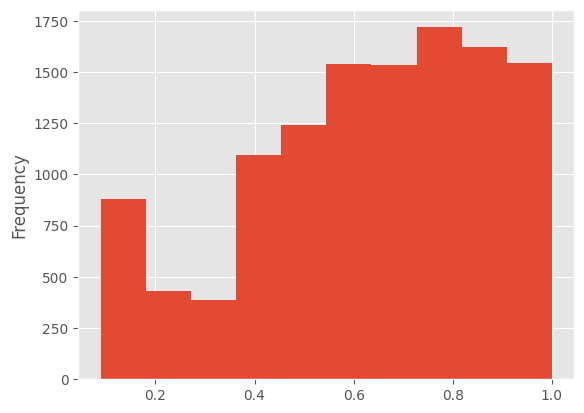

In [ ]:
# Определение, какие переменные являются количественными
# satisfaction level - количественная переменная
hr['satisfaction_level'].plot.hist()

<Axes: ylabel='Frequency'>

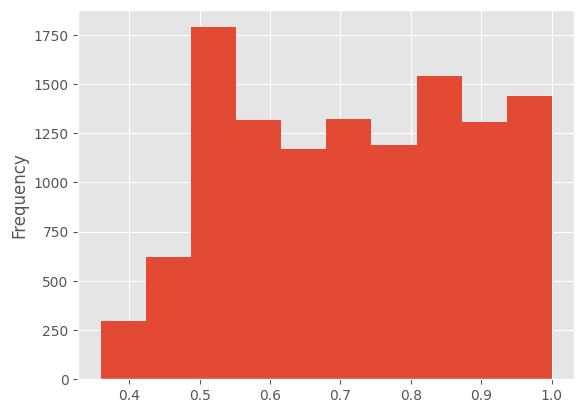

In [ ]:
#Last_evaluation - Время с момента последней оценки в годах - количественная переменная
hr['last_evaluation'].plot.hist()

<Axes: ylabel='Frequency'>

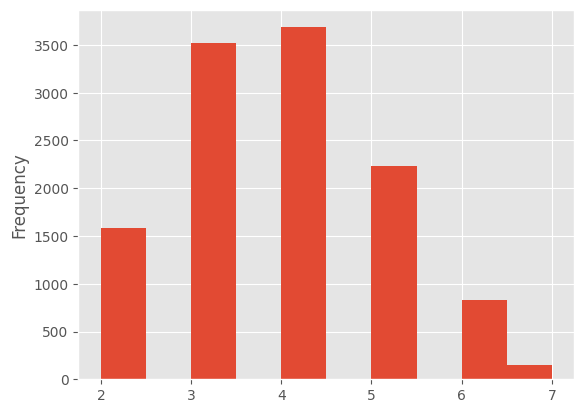

In [ ]:
#number_project - Количество проектов, выполненных за время работы - количественная переменная
hr['number_project'].plot.hist()

<Axes: ylabel='Frequency'>

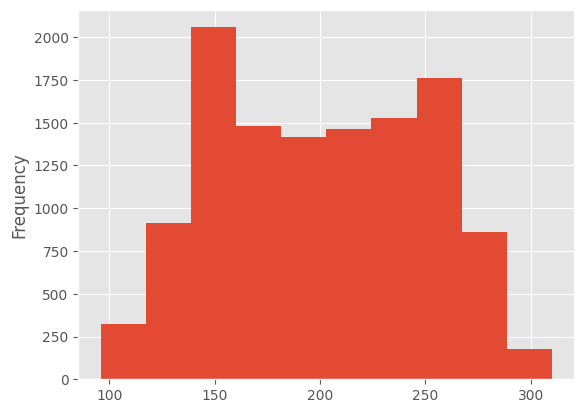

In [ ]:
#average_montly_hours - Среднее количество часов на рабочем месте в месяц - количественная переменная
hr['average_montly_hours'].plot.hist()

<Axes: ylabel='Frequency'>

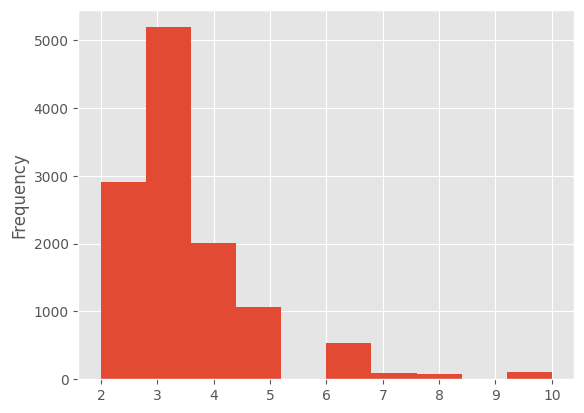

In [ ]:
#time_spend_company - Стаж работы в компании в годах - количественная переменная
hr['time_spend_company'].plot.hist()

<Axes: ylabel='Frequency'>

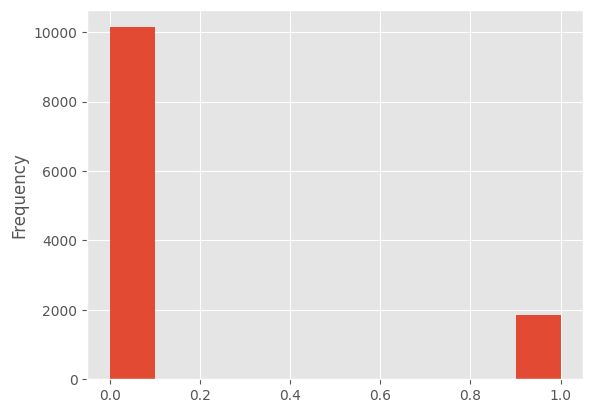

In [ ]:
#Work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником - качественная переменная
hr['Work_accident'].plot.hist()

<Axes: ylabel='Frequency'>

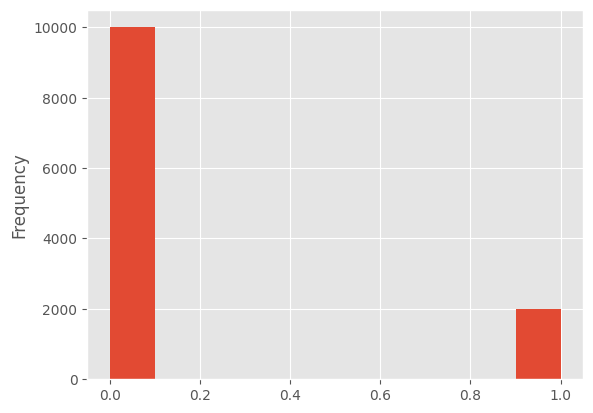

In [ ]:
#left - уволился ли сотрудник - качественная переменная
hr['left'].plot.hist()

<Axes: ylabel='Frequency'>

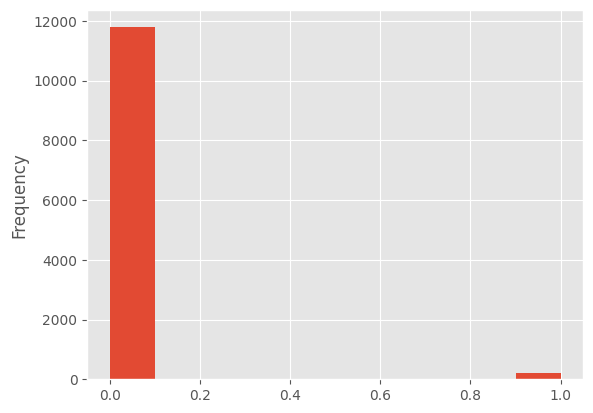

In [ ]:
#promotion_last_5years - повышался ли сотрудник за последние пять лет - качественная переменная
hr['promotion_last_5years'].plot.hist()

In [ ]:
#department - отдел в котором работает сотрудник - качественная переменная
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
#salary - относительный уровень зарплаты - качественная переменная
hr['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

Качественные переменные: salary, department, promotion_last_5years, left, Work_accident

Количественные переменные: time_spend_company, average_montly_hours, number_project, last_evaluation, satisfaction_level

In [ ]:
#Рассчитайте основные статистики для переменных
#(среднее,мин/макс,сред.отклонение)
hr_quant = hr[['time_spend_company', 'average_montly_hours', 'number_project', 'last_evaluation', 'satisfaction_level']]

hr_quant.describe().loc[['mean','std','min','max']].round(1)

,time_spend_company,average_montly_hours,number_project,last_evaluation,satisfaction_level
mean,3.4,200.5,3.8,0.7,0.6
std,1.3,48.7,1.2,0.2,0.2
min,2.0,96.0,2.0,0.4,0.1
max,10.0,310.0,7.0,1.0,1.0


In [ ]:
#расчет медианы
hr_quant.median().round(1)

time_spend_company        3.0
average_montly_hours    200.0
number_project            4.0
last_evaluation           0.7
satisfaction_level        0.7
dtype: float64

In [ ]:
#мода + поиск выбросов
for col in hr_quant:
  mode = hr_quant[col]. mode()[0]
  iqr = (hr_quant[col].quantile(q=0.75) - hr_quant[col].quantile(q=0.25))
  lower_bound = (hr_quant[col].quantile(q=0.25) - 1.5*iqr).round()
  upper_bound = (hr_quant[col].quantile(q=0.75) + 1.5*iqr).round()
  outliers = [x for x in hr_quant[col] if x < lower_bound or x > upper_bound]
  print(f"{hr_quant[col].name}:  'Mode': {mode}")

  print(f"{hr_quant[col].name}: 'outliers': {outliers}")

# outliers: time_spend_company
# некоторые сотрудники провели в компании больше 6 лет - это не выбросы в даном случае, нам важны их показатели, но в выводах стоит делать поправку на время в компании


time_spend_company:  'Mode': 3
time_spend_company: 'outliers': [8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 10, 10, 10, 8, 8, 8, 10, 10, 7, 7, 7, 7, 10, 10, 10, 10, 10, 10, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 10, 10, 10, 8, 8, 8, 10, 10, 7, 7, 7, 7, 10, 10, 10, 10, 10, 10, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 10, 10, 10, 8, 8, 8, 10, 10, 7, 7, 7, 7, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 10, 10, 10, 8, 8, 8, 10, 10, 7, 7, 7, 7, 10, 10, 10, 10, 10, 10, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 10, 10, 10, 8, 8, 8, 10, 10, 7, 7, 7, 7, 10, 10, 10, 10, 10, 10, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 10, 10, 10, 10, 10, 10, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 10, 10,

In [ ]:
#Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.

hr_quant.corr().round(2)

,time_spend_company,average_montly_hours,number_project,last_evaluation,satisfaction_level
time_spend_company,1.00,0.10,0.19,0.10,-0.15
average_montly_hours,0.10,1.00,0.33,0.26,-0.01
number_project,0.19,0.33,1.00,0.27,-0.13
last_evaluation,0.10,0.26,0.27,1.00,0.10
satisfaction_level,-0.15,-0.01,-0.13,0.10,1.00


<Axes: >

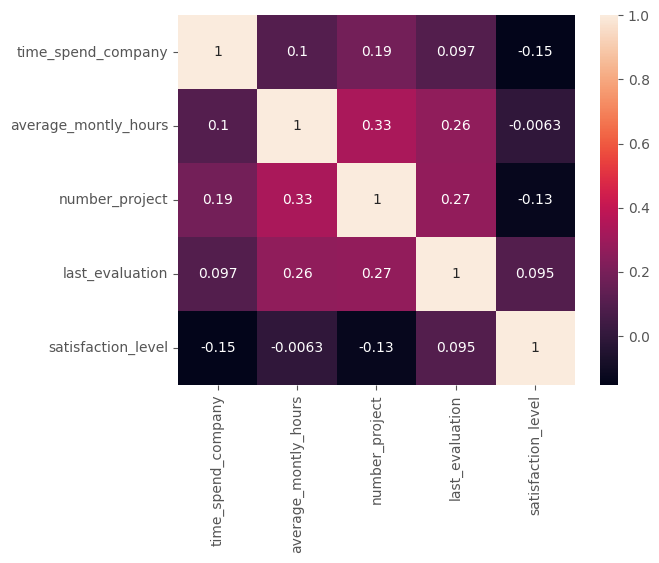

In [ ]:
sns.heatmap(hr_quant.corr(), annot=True)

Определите две самые скоррелированные и две наименее
скоррелированные переменные

Самые скоррелированные переменные:
 number_project и average_montly_hours: 0.33
 Логически это объясняется тем, что чем больше человек проводит часов на рабочем месте,
 тем больше он может выполнить проектов

наименее скоррелированные переменные:
 average_monthly_hours и satisfaction_level: -0.0063
 Количество рабочих часов и уровень удовлетворенности работой не скоррелированы



In [ ]:
# Рассчитайте сколько сотрудников работает в каждом департаменте

hr.groupby('department').size()
# Большинство работает в Sales, Technical, Support, IT, Product management

department
IT              976
RandD           694
accounting      621
hr              601
management      436
marketing       673
product_mng     686
sales          3239
support        1821
technical      2244
dtype: int64

In [ ]:
#Показать распределение сотрудников по зарплатам.

hr.groupby('salary').size()

salary
high       990
low       5740
medium    5261
dtype: int64

<Axes: xlabel='count', ylabel='salary'>

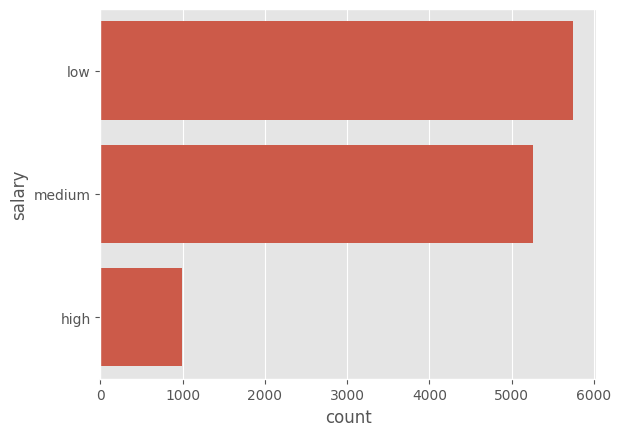

In [ ]:
sns.countplot(hr['salary'])
#Больше всего сотрудников получают зарплату уровня low, меньше всего - high

In [ ]:
#Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

hr.groupby(['department','salary']).size()

department   salary
IT           high        71
             low        476
             medium     429
RandD        high        47
             low        322
             medium     325
accounting   high        63
             low        296
             medium     262
hr           high        38
             low        296
             medium     267
management   high       128
             low        139
             medium     169
marketing    high        62
             low        310
             medium     301
product_mng  high        52
             low        343
             medium     291
sales        high       237
             low       1553
             medium    1449
support      high       126
             low        867
             medium     828
technical    high       166
             low       1138
             medium     940
dtype: int64

In [ ]:
#Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

#Проверка - можно ли работать с данными
# average_montly_hours -нет выбросов
# переменная оклада - salary

# Нулевая гипотеза (H0): средние значения рабочего времени групп равны.
# Альтернативная гипотеза (H1): средние значения рабочего времени групп не равны
# проводим T-test

#группа людей с высоким окладом
group_h = hr[hr['salary'] == 'high']
#группа людей с низким окладом
group_l = hr[hr['salary'] == 'low']

#группа людей с высоким окладом - среднее кол-во часов работы
time_mean_h = group_h['average_montly_hours'].mean()
print('Группа людей с высоким окладом - среднее кол-во часов работы:',time_mean_h.round(2))
#группа людей с низким окладом - среднее кол-во часов работы
time_mean_l = group_l['average_montly_hours'].mean()
print('Группа людей с низким окладом - среднее кол-во часов работы:', time_mean_l.round(2))

t,p = stats.ttest_ind(group_h['average_montly_hours'], group_l['average_montly_hours'])
print('T-statistics:', t.round(2),'P-value:', p.round(2), sep = '\n')

if p > 0.05:
  print('гипотеза не отвергается, мы не можем сделать вывод о различии среднего времени в группах с высокой и низкой зарплатой на 95% доверительном уровне')
else:
  print('гипотеза отвергается, на 95% доверительном уровне мы можем наблюдать основания для различия среднего времени в группах с высокой и низкой зарплатой')
#p-value = 0.47 > 0.05
# гипотеза не отвергается, мы не можем сделать вывод о различии среднего времени в группах с высокой и низкой зарплатой на 95% доверительном уровне




Группа людей с высоким окладом - среднее кол-во часов работы: 200.07
Группа людей с низким окладом - среднее кол-во часов работы: 200.44
T-statistics:
-0.22
P-value:
0.83
гипотеза не отвергается, мы не можем сделать вывод о различии среднего времени в группах с высокой и низкой зарплатой на 95% доверительном уровне


In [ ]:
#Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

# разделим датасет на 2 группы по критерию: уволился или нет сотрудник
group_fir = hr[hr['left'] == 1]
group_pres = hr[hr['left'] == 0]

In [ ]:
# Доля сотрудников с повышением за последние 5 лет
#promotion_last_5years
percent_fir = group_fir['promotion_last_5years'].mean()
percent_pres = group_pres['promotion_last_5years'].mean()
print("Доля сотрудников с повышением за последние 5 лет среди уволившихся:", percent_fir.round(3), "Доля сотрудников с повышением за последние 5 лет среди оставшихся:", percent_pres.round(2), sep = "\n")

Доля сотрудников с повышением за последние 5 лет среди уволившихся:
0.004
Доля сотрудников с повышением за последние 5 лет среди оставшихся:
0.02


In [ ]:
# Средняя степень удовлетворенности
# satisfaction_level
fir_mean = group_fir['satisfaction_level'].mean()
pres_mean = group_pres['satisfaction_level'].mean()
print("Средняя степень удовлетворенности среди уволившихся:", fir_mean.round(2), "Средняя степень удовлетворенности среди оставшихся:", pres_mean.round(2), sep = "\n")

Средняя степень удовлетворенности среди уволившихся:
0.44
Средняя степень удовлетворенности среди оставшихся:
0.67


In [ ]:
# Среднее количество проектов
# number_projects
fir_proj = group_fir['number_project'].mean()
pres_proj = group_pres['number_project'].mean()
print("Среднее количество проектов среди уволившихся:", fir_proj.round(2), "Среднее количество проектов среди оставшихся:", pres_proj.round(2), sep = "\n")


Среднее количество проектов среди уволившихся:
3.88
Среднее количество проектов среди оставшихся:
3.79


In [ ]:
#Разделить данные на тестовую и обучающую выборки

#убрать столбцы department и salary (не числовые)
hr_lda = hr.iloc[:, 0:8]

from sklearn.model_selection import train_test_split
data_class = hr_lda.left
x_train, x_test, y_train, y_test = train_test_split(hr_lda, data_class, test_size=0.25, random_state=42)

len(y_test)


2998

In [ ]:
data_class

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [ ]:
#Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
#Оценить качество модели на тестовой выборки
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()


In [ ]:
#обучение
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
lda.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
result = pd.DataFrame([y_test, lda.predict(x_test)])
print(result)

           397    3107   9331   357    1326   1657   5844   9805   10754  \
left         1.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0   
Unnamed 0    0.0    NaN    NaN    0.0    0.0    0.0    NaN    NaN    NaN   

           3644   ...  7112   7741   11617  751    7853   7337   376    2467   \
left         0.0  ...    0.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0   
Unnamed 0    NaN  ...    NaN    NaN    NaN    0.0    NaN    NaN    0.0    0.0   

           6014   6152   
left         0.0    0.0  
Unnamed 0    NaN    NaN  

[2 rows x 2998 columns]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, lda.predict(x_test)).round(2)

#коэффициент 0.83 - хорошее качество модели

0.83

In [ ]:
lda.coef_

array([[-4.35584368,  0.79760384, -0.17236883,  0.00439597,  0.30703785,
        -0.95519911,  0.        , -1.02204268]])